## Простая нейросеть на Keras

Давайте попрубуем сделать нейросеть на Keras использую полученные выше знания. Попробуем обучить нейросеть различать рукописные цифры.

In [ ]:
import keras
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Код нейронной сети в Keras!
###############################
import numpy as np
#import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [ ]:

(train_imagesi,train_labels),(test_imagesi,test_labels)=mnist.load_data()

# можно брать mnist из специальной библиотеки
#train_images = mnist.train_images()
#train_labels = mnist.train_labels()
#test_images = mnist.test_images()
#test_labels = mnist.test_labels()

# приведем изображение к диапазону (-1,1).
train_images = (train_imagesi / 127) - 1
test_images = (test_imagesi / 127) - 1

# делаем векторизацию, т.к. наши слои полносвязные и хотят на вход вектор.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

11501568/11490434 [==============================] - 0s 0us/step


Размер набора входных данных для обучения 

In [ ]:
train_images.shape

(60000, 784)

In [ ]:
def create(hidden_layers=2, name='my_model', n_neurons=100):
  '''
  Функция для создания нейросетей с hidden_layers числом скрытых слоев
  и n_neurons нейронов
  '''

  model = Sequential(name=name)
  model.add(Dense( 128, activation='relu', input_shape=(784,)))  
  for k in range(hidden_layers):
    model.add(Dense(  n_neurons, activation='tanh')) 
  model.add(Dense(10, activation='softmax')) 

  return model

Компилируем сеть с оптимизатором , функцией потерь и метрикой:

Превратим выходы в векторые (OHE в keras - from keras.utils import to_categorical)

In [ ]:
train_labels[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
y_t = to_categorical(train_labels)
y_tt = to_categorical(test_labels)

In [ ]:
y_t.shape, train_images.shape

((60000, 10), (60000, 784))

In [ ]:
y_t[:3,:]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
train_labels[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

Проекспериментируем с разным количеством скрытых слоев.

In [ ]:
models_results = [[],[]]

In [ ]:
models = []
for i in [2, 3, 5, 10]:
  model = create(i, name='model'+str(i))
  model.compile(optimizer='adam',
          loss=keras.losses.CategoricalCrossentropy(),
          metrics=['accuracy'])
  models.append(model) 
         
  models_results[0].append(model.evaluate(test_images, y_tt))
  

313/313 [==============================] - 1s 3ms/step - loss: 2.3575 - accuracy: 0.0833


In [ ]:
models_results

[[[2.4381072521209717, 0.10740000009536743],
  [2.4390292167663574, 0.09120000153779984],
  [2.4342052936553955, 0.10090000182390213],
  [2.357470989227295, 0.08330000191926956]],
 []]

In [ ]:
u = 0
for i in [2, 3, 5, 10]:
  model = models[u]
  model.fit(  
    train_images[:,:],
    y_t[:,:],
    epochs=15,
    batch_size=32, validation_split=0.2
  )
  u += 1
  models_results[1].append(model.evaluate(test_images, y_tt))


Epoch 1/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3206 - accuracy: 0.9014 - val_loss: 0.1891 - val_accuracy: 0.9408
Epoch 2/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1655 - accuracy: 0.9487 - val_loss: 0.1346 - val_accuracy: 0.9597
Epoch 3/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1326 - accuracy: 0.9594 - val_loss: 0.1468 - val_accuracy: 0.9557
Epoch 4/15
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1115 - accuracy: 0.9650 - val_loss: 0.1341 - val_accuracy: 0.9591
Epoch 5/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1020 - accuracy: 0.9676 - val_loss: 0.1451 - val_accuracy: 0.9566
Epoch 6/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0954 - accuracy: 0.9700 - val_loss: 0.1041 - val_accuracy: 0.9689
Epoch 7/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0807 - accuracy: 0.9744 - val_loss: 0.1203 - val_accuracy:

In [ ]:
for i in models:
  del i

In [ ]:
models_results

[[[2.4964842796325684, 0.1509000062942505],
  [2.373863458633423, 0.11230000108480453],
  [2.4067273139953613, 0.10450000315904617],
  [2.333819627761841, 0.09160000085830688]],
 [[0.09420281648635864, 0.9735000133514404],
  [0.11644316464662552, 0.9675999879837036],
  [0.11403066664934158, 0.9692000150680542],
  [0.13948561251163483, 0.9611999988555908]]]

заметим что в случае с сетью  с 3 скрытыми слоями начальная точка была выбрана плохо и сеть изначально хуже остальных так что ее результат нельзя считать статистически значимым. Общая тенденция понятна: двухслойная сеть и так дает хороший результат, увеличивая количество слоев можно добится лишь переобучения.

Проекспериментируем с нейросетью с 2 скрытыми слоями с разным количеством нейронов в скрытых слоях.

In [ ]:
models2 = []
models_results2 = [[], []]

In [ ]:
u = 0
for i in [50, 100, 200, 500, 1000]:
  model = create(2, n_neurons=i)

  model.compile(optimizer='adam',
          loss=keras.losses.CategoricalCrossentropy(),
          metrics=['accuracy'])
  
  models2.append(model)
  models_results2[0].append(model.evaluate(test_images, y_tt))



313/313 [==============================] - 1s 3ms/step - loss: 2.4532 - accuracy: 0.0967


In [ ]:
u = 0
for i in [50, 100, 200, 500, 1000]:
  model = models2[u]
  model.fit(  
    train_images[:,:],
    y_t[:,:],
    epochs=15,
    batch_size=32, validation_split=0.2
  )
  u += 1
  models_results2[1].append(model.evaluate(test_images, y_tt))


Epoch 1/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3449 - accuracy: 0.8975 - val_loss: 0.2115 - val_accuracy: 0.9359
Epoch 2/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1803 - accuracy: 0.9440 - val_loss: 0.1798 - val_accuracy: 0.9421
Epoch 3/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1418 - accuracy: 0.9563 - val_loss: 0.1439 - val_accuracy: 0.9562
Epoch 4/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1232 - accuracy: 0.9615 - val_loss: 0.1412 - val_accuracy: 0.9581
Epoch 5/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1088 - accuracy: 0.9662 - val_loss: 0.1320 - val_accuracy: 0.9595
Epoch 6/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0983 - accuracy: 0.9702 - val_loss: 0.1281 - val_accuracy: 0.9608
Epoch 7/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0898 - accuracy: 0.9720 - val_loss: 0.1273 - val_accuracy:

In [ ]:
models_results2

[[[2.4083526134490967, 0.05550000071525574],
  [2.3642537593841553, 0.07540000230073929],
  [2.528761625289917, 0.07270000129938126],
  [2.418097734451294, 0.0778999999165535],
  [2.453226089477539, 0.09669999778270721]],
 [[0.1146511361002922, 0.9692000150680542],
  [0.11080296337604523, 0.9692999720573425],
  [0.10749316215515137, 0.9704999923706055],
  [0.11071991175413132, 0.9707000255584717],
  [0.14459529519081116, 0.9686999917030334]]]

Можно заметить что модель с 50 нейронов в скрытых слоях проигрывает в качестве тем что с 100 и 200 и 500. А модель с 1000 нейронов уже подает признаки переобучения. Так как прирост не слишком большой, выберем 50 нейронов как оптимум для нашей нейронки.

In [ ]:
for i in models2:
  del i

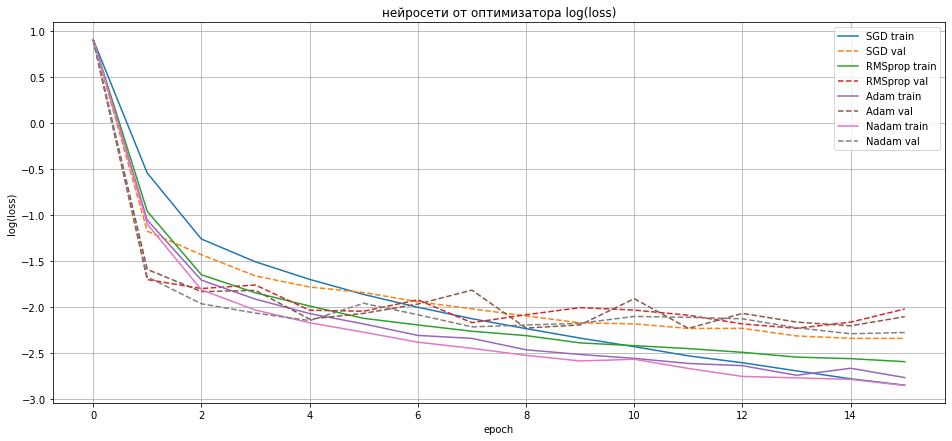

In [ ]:
# создаем модель model
model = create(hidden_layers=2, n_neurons=50)
# сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
model.save_weights('model.h5')

plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для выводв результатов
epoch = np.arange(epochs+1)

# будем изменять оптимизаторы

#opt_list = [keras.optimizers.SGD( ),keras.optimizers.Adam( ),keras.optimizers.Nadam( )]
for i_optim in ['SGD','RMSProp','adam','NAdam']:
  # создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры)
  modeli = create(hidden_layers=2, n_neurons=50)
  # загружаем веса modeli.load_weights('model.h5')
  modeli.load_weights('model.h5')
  # компилируем modeli с одним из оптимизаторов
  modeli.compile(
      optimizer=i_optim,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
  # вычисляем ошибку для modeli без обучения
  hh0_tr = modeli.evaluate(  train_images[:48000,:], to_categorical(train_labels[:48000]),verbose = 0)
  hh0_val = modeli.evaluate(  train_images[48000:,:], to_categorical(train_labels[48000:]),verbose = 0)
  # проводим обучение модели 
  hh = modeli.fit(
                  train_images,
                  to_categorical(train_labels),
                  epochs=epochs,
                  batch_size=32, validation_split=0.2, verbose = 0
                  )
  # картинки
  plt.plot(epoch,np.log([hh0_tr[0]]+hh.history['loss']),'-',label = modeli.optimizer.get_config()['name']+' train')
  plt.plot(epoch,np.log([hh0_val[0]]+hh.history['val_loss']),'--',label = modeli.optimizer.get_config()['name']+' val')
plt.legend()
plt.grid('On')

plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()


Лучше всех и на тренировочном и на валидационом наборе справился SGD

In [ ]:
 modeli.optimizer.get_config()

{'beta_1': 0.9,
 'beta_2': 0.999,
 'decay': 0.004,
 'epsilon': 1e-07,
 'learning_rate': 0.001,
 'name': 'Nadam'}

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
preds = pd.DataFrame(modeli.predict(test_images))

In [ ]:
preds.head()

,0,1,2,3,4,5,6,7,8,9
0,1.708896e-05,1.892544e-04,0.000343,4.491081e-05,1.047102e-05,1.067813e-06,9.030241e-10,0.999172,0.000003,2.185921e-04
1,4.828311e-06,9.983388e-05,0.999762,9.335185e-05,1.287114e-07,2.120840e-07,1.973508e-05,0.000003,0.000016,2.647289e-08
2,3.221642e-08,9.999105e-01,0.000005,2.861952e-06,1.613556e-06,1.124954e-06,4.218715e-07,0.000076,0.000003,2.092952e-07
3,9.994230e-01,7.089341e-07,0.000105,5.095846e-05,1.816443e-05,4.247626e-06,1.519997e-04,0.000054,0.000029,1.635182e-04
4,7.661193e-06,1.286143e-06,0.000019,2.955762e-07,9.995678e-01,5.640995e-07,8.331578e-06,0.000012,0.000002,3.800299e-04


In [ ]:
pred_lst = []
for i in range(preds.shape[0]):
  pred_lst.append(preds.loc[i, :].argmax())

In [ ]:
print('\nClassification Report\n')
print(classification_report(test_labels, pred_lst))


Classification Report

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.98      0.99      1135
           2       0.95      0.98      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.99      0.96      0.98       982
           5       0.96      0.96      0.96       892
           6       0.99      0.97      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.98      0.96      0.97       974
           9       0.96      0.97      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



По итогам этой работы можно придти к выводу что не стоит выбирать больщое число скрытых слоев 
и количество нейронов чтоб это не привело к переобучению и не помешает эффективности.